<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/money_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo set data (chưa split)

In [111]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [112]:
folder='/content/drive/MyDrive/money/'

In [113]:
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1k_'):
    output=1.0
  if file.startswith('5k_'):
    output=2.0
  if file.startswith('20k_'):
    output=3.0
  if file.startswith('50k_'):
    output=4.0
  if file.startswith('100k_'):
    output=5.0
  if file.startswith('200k_'):
    output=6.0
  if file.startswith('500k_'):
    output=7.0
  photo = load_img(folder+file,target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [114]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/photo_money.npy',photos)
save('/content/drive/MyDrive/label_money.npy',labels)

In [115]:
photos.shape

(640, 200, 200, 3)

In [116]:
labels.shape

(640,)

split data thành 70% train, 30% test

In [117]:
from sklearn.model_selection import train_test_split

In [119]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)
#test_x, test_y = train_test_split(photos,labels, test_size=0.3)

In [120]:
train_x.shape

(448, 200, 200, 3)

In [121]:
test_x.shape

(192, 200, 200, 3)

scale lại data

In [122]:
train_x = train_x.reshape([448,200,200,3])
train_x = train_x.astype('float32')
train_x = train_x/255

In [123]:
test_x = test_x.reshape([192,200,200,3])
test_x = test_x.astype('float32')
test_x = test_x/255

In [124]:
from keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [125]:
train_x.shape

(448, 200, 200, 3)

In [126]:
y_train.shape

(448, 8)

tạo mô hình CNN

In [127]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [135]:
batch_size = 100
epochs = 10
classes = 8

In [136]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))

In [137]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [138]:
model.add(Flatten())

In [139]:
model.add(Dense(400,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))


In [140]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [141]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [142]:
train = model.fit(train_x,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
5/5 [==============================] - 6s 478ms/step - loss: 8.0368 - accuracy: 0.1763
Epoch 2/10
5/5 [==============================] - 1s 151ms/step - loss: 2.3103 - accuracy: 0.3036
Epoch 3/10
5/5 [==============================] - 1s 158ms/step - loss: 1.4367 - accuracy: 0.4487
Epoch 4/10
5/5 [==============================] - 1s 155ms/step - loss: 1.2030 - accuracy: 0.5714
Epoch 5/10
5/5 [==============================] - 1s 142ms/step - loss: 0.9372 - accuracy: 0.6384
Epoch 6/10
5/5 [==============================] - 1s 149ms/step - loss: 0.7241 - accuracy: 0.7589
Epoch 7/10
5/5 [==============================] - 1s 149ms/step - loss: 0.5835 - accuracy: 0.7857
Epoch 8/10
5/5 [==============================] - 1s 138ms/step - loss: 0.4704 - accuracy: 0.8482
Epoch 9/10
5/5 [==============================] - 1s 147ms/step - loss: 0.2861 - accuracy: 0.9129
Epoch 10/10
6/6 [==============================] - 1s 25ms/step - loss: 0.2153 - accuracy: 0.9583
Accuracy: 0.95833331

In [145]:
model.save('/content/drive/MyDrive/money_detection.h5')

1/1 [==============================] - 0s 31ms/step
[4]
Đây là 50k


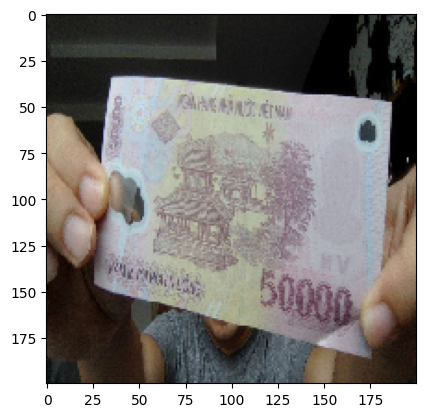

In [147]:
#test mo hinh
from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('50k_test1.png',target_size=(200,200,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đây là 1k")
if (a == 2):
  print("Đây là 5k")
if (a == 3):
  print("Đây là 20k")
if (a == 4):
  print("Đây là 50k")
if (a == 5):
  print("Đây là 100k")
if (a == 6):
  print("Đây là 200k")
if (a == 7):
  print("Đây là 500k")